In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import seaborn as sns

In [2]:
df_preprocessed = pd.read_csv("data\dataset_knn_neighbors.csv",  encoding='utf-8')

# Linear Regression (with interaction)

In [3]:
y = df_preprocessed['price']

In [4]:
X = df_preprocessed.drop(columns=['price'])

##### Adding interaction terms

In [5]:
X_lineal = X.copy()

In [6]:
X_lineal['surface_x_bedrooms'] = X_lineal['habitableSurface']*X_lineal['bedroomCount']
X_lineal['surface_x_bathrooms'] = X_lineal['habitableSurface']*X_lineal['bathroomCount']
X_lineal['bed_x_bath'] = X_lineal['bedroomCount']*X_lineal['bathroomCount']
X_lineal['bath_x_toilet'] = X_lineal['bathroomCount']*X_lineal['toiletCount']

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split


X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_lineal, y, test_size=0.2, random_state=42)


In [8]:
numerical_cols_X = df_preprocessed.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_X.remove('price')
numerical_cols_X

['bedroomCount',
 'bathroomCount',
 'habitableSurface',
 'buildingConstructionYear',
 'facedeCount',
 'landSurface',
 'toiletCount',
 'totalParkingCount',
 'epcScore',
 'type_APARTMENT',
 'type_HOUSE',
 'subtype_APARTMENT',
 'subtype_APARTMENT_BLOCK',
 'subtype_BUNGALOW',
 'subtype_CASTLE',
 'subtype_CHALET',
 'subtype_COUNTRY_COTTAGE',
 'subtype_DUPLEX',
 'subtype_EXCEPTIONAL_PROPERTY',
 'subtype_FARMHOUSE',
 'subtype_FLAT_STUDIO',
 'subtype_GROUND_FLOOR',
 'subtype_HOUSE',
 'subtype_KOT',
 'subtype_LOFT',
 'subtype_MANOR_HOUSE',
 'subtype_MANSION',
 'subtype_MIXED_USE_BUILDING',
 'subtype_OTHER_PROPERTY',
 'subtype_PAVILION',
 'subtype_PENTHOUSE',
 'subtype_SERVICE_FLAT',
 'subtype_TOWN_HOUSE',
 'subtype_TRIPLEX',
 'subtype_VILLA',
 'province_Antwerp',
 'province_Brussels',
 'province_EastFlanders',
 'province_FlemishBrabant',
 'province_Hainaut',
 'province_Limburg',
 'province_Liège',
 'province_Luxembourg',
 'province_Namur',
 'province_WalloonBrabant',
 'province_WestFlanders',
 

In [9]:

X_train_scaled = X_train_l.copy()
X_test_scaled = X_test_l.copy()


scaler = StandardScaler()


X_train_scaled[numerical_cols_X] = scaler.fit_transform(X_train_l[numerical_cols_X])
X_test_scaled[numerical_cols_X] = scaler.transform(X_test_l[numerical_cols_X])



In [10]:

print("\nOriginal X_train numerical features head:")
print(X_train_l[numerical_cols_X].head())

print("\nScaled X_train numerical features head:")
print(X_train_scaled[numerical_cols_X].head())

print("\nMeans of scaled training features:")
print(X_train_scaled[numerical_cols_X].mean())
print("\nStandard Deviations of scaled training features:")
print(X_train_scaled[numerical_cols_X].std())


Original X_train numerical features head:
       bedroomCount  bathroomCount  habitableSurface  \
61011           3.0            1.0             195.0   
61497           5.0            2.0             264.0   
56949           3.0            1.0             103.0   
36542           3.0            1.0             659.0   
37238           3.0            2.0             139.0   

       buildingConstructionYear  facedeCount  landSurface  toiletCount  \
61011                    1993.0          3.0        660.0          2.0   
61497                    1949.6          2.0       1043.8          2.0   
56949                    1979.2          2.0         83.0          1.0   
36542                    1961.0          4.0       1565.0          2.0   
37238                    1996.6          3.2        581.4          1.0   

       totalParkingCount  epcScore  type_APARTMENT  ...  \
61011                0.0       2.0             0.0  ...   
61497                3.0       3.0             0.0  ...  

In [11]:
model = LinearRegression()
model.fit(X_train_scaled, y_train_l)
print("TRAINING SET: ")
print("R² Score :", model.score(X_train_scaled, y_train_l))


TRAINING SET: 
R² Score : 0.7283705381706184


In [12]:

y_pred_l = model.predict(X_test_scaled)



In [13]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


print("Mean Squared Error:", mean_squared_error(y_test_l, y_pred_l))
print("Mean Absolute Error:", mean_absolute_error(y_test_l, y_pred_l))
print("R² Score :", r2_score(y_test_l, y_pred_l))



Mean Squared Error: 7780028761.417949
Mean Absolute Error: 64639.42372955489
R² Score : 0.7122324564352815


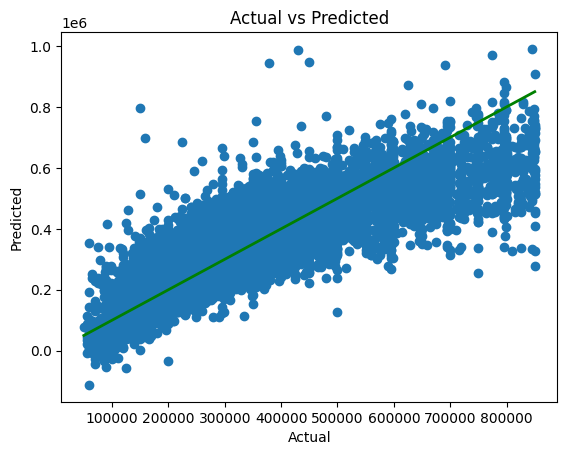

In [14]:
plt.scatter(y_test_l, y_pred_l)
plt.plot([y_test_l.min(), y_test_l.max()], [y_test_l.min(), y_test_l.max()], c='g', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

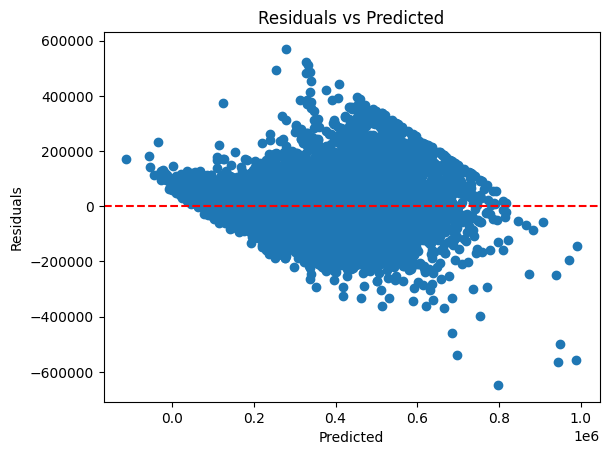

In [15]:
residuals_l = y_test_l - y_pred_l
plt.scatter(y_pred_l, residuals_l)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

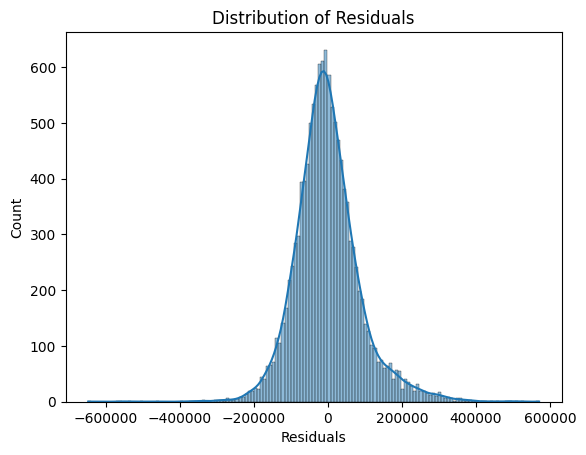

In [16]:

sns.histplot(residuals_l, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()